In [1]:

from multiprocessing import Process, Queue
import glob
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import math as m
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)

In [2]:
fuel = pd.DataFrame.from_csv('Fuel Efficiciency/Combustible - copia.csv', index_col=None)
fuel.head(100)

,IN,Date,Train_Bulletin,Train_nbr,Train_nbr2,Train_int,id_Type,Type,Id_Sub_Type,Sub_Type,...,Hours,Kilometers,Liters,Net_Ton_Km,Gross_Ton_km,Use_GTK,Lts_x_GTK,Lts_x_GTK_Hr,Net_Tons,Gross_Tons
0,MANIOBRA,18/3/2011,4604,160E,E,160,1,CARGA,2,CARGA GENERAL,...,12,239.8,200.0,0,0,False,2654.545455,2654.545455,633923,1437383
1,MANIOBRA,18/3/2011,4606,102,X,102,1,CARGA,3,DERIVADOS DE PETROLEO,...,10,261.7,250.0,0,0,False,2435.815467,2435.815467,371451,1302941
2,MANIOBRA,18/3/2011,4599,201,X,201,2,ESPECIALES,8,SERVICIO INTERNO,...,12,182.1,300.0,0,0,False,2654.545455,2654.545455,1036000,1455460
3,MANIOBRA,18/3/2011,4610,2,X,2,3,MIXTO,10,TREN MIXTO AL SUR,...,11,0.0,200.0,0,0,False,2173.351099,2173.351099,165000,355280
4,MANIOBRA,18/3/2011,4603,8,X,8,4,PASAJEROS,1,AUTOMOTOR,...,12,239.8,300.0,0,0,False,2273.585723,2273.585723,0,19000
5,MANIOBRA,18/3/2011,4601,13,X,13,4,PASAJEROS,4,EXPRESO ORIENTAL,...,10,239.8,150.0,0,0,False,2273.585723,2273.585723,36000,221000
6,MANIOBRA,18/3/2011,4608,9,X,9,4,PASAJEROS,11,TREN REGIONAL,...,7,134.2,50.0,0,0,False,2330.985915,2330.985915,65453,296453
7,MANIOBRA,18/3/2011,4609,10,X,10,4,PASAJEROS,11,TREN REGIONAL,...,4,134.2,50.0,0,0,False,2010.068405,2010.068405,74605,289605
8,MANIOBRA,19/3/2011,4619,7,X,7,4,PASAJEROS,1,AUTOMOTOR,...,5,239.8,50.0,0,0,False,2173.351099,2173.351099,0,19000
9,MANIOBRA,20/3/2011,4626,162,X,162,1,CARGA,2,CARGA GENERAL,...,12,239.8,200.0,0,0,False,2273.585723,2273.585723,490818,1612508


In [4]:
fuel = pd.read_csv('Fuel Efficiciency/Comb_10_17.csv', sep =',',index_col=None)
fuel.head(100)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 32: invalid start byte

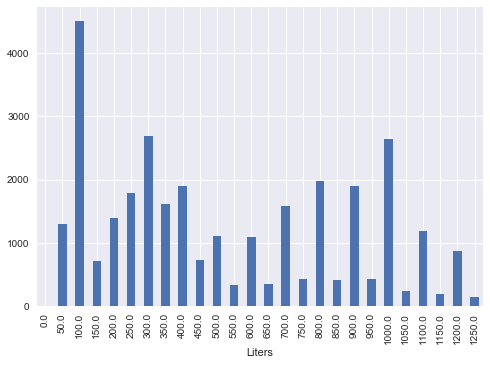

In [3]:
f = fuel
# Filter out Shunting Locomotives, choose only consumption between 40 and 1300 liters and postive GTK
f = f[(f.Liters >40) & (f.Liters < 1300) & (f.IN == 'TREN') & (f.Gross_Ton_km >0)]
# Show the distribution of consumption in 50 liter intervals
f.groupby(f.Liters // 50*50).size().plot(kind='bar')


In [4]:
# Cast the following columns as float
f[['Hours','Kilometers','Hours','Liters','Net_Ton_Km','Gross_Ton_km','Net_Ton_Km','Gross_Tons','Net_Tons']] = f[['Hours','Kilometers','Hours','Liters','Net_Ton_Km','Gross_Ton_km','Net_Ton_Km','Gross_Tons','Net_Tons']].astype(float)

C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [9]:
# Replace NaN with 0
f[['Train_int','Train_Bulletin','id_Type','Id_Sub_Type','Id_Model_Loc','Id_Loc','Direction','Track_id','Id_Engineer','Id_fireman']] = f[['Train_int','Train_Bulletin','id_Type','Id_Sub_Type','Id_Model_Loc','Id_Loc','Direction','Track_id','Id_Engineer','Id_fireman']].fillna(0, inplace= True)
# Cast the following columns as int
f[['Train_int','Train_Bulletin','id_Type','Id_Sub_Type','Id_Model_Loc','Id_Loc','Direction','Track_id','Id_Engineer','Id_fireman']] = f[['Train_int','Train_Bulletin','id_Type','Id_Sub_Type','Id_Model_Loc','Id_Loc','Direction','Track_id','Id_Engineer','Id_fireman']].astype(int)

C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

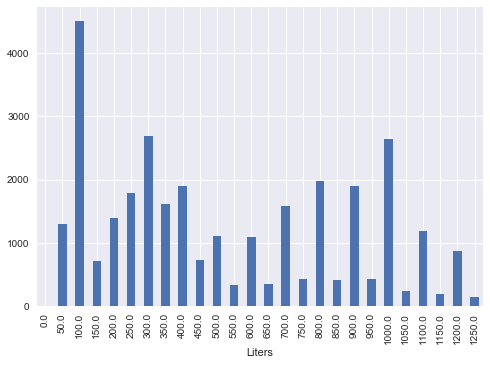

In [5]:
f = fuel
# Filter Shunting Locomotives, choose only consumption between 40 and 1300 liters and postivo GTK
f = f[(f.Liters >40) & (f.Liters < 1300) & (f.IN == 'TREN') & (f.Gross_Ton_km >0)]
# Show the distribution of consumption in 50 liter intervals
f.groupby(f.Liters // 50*50).size().plot(kind='bar')


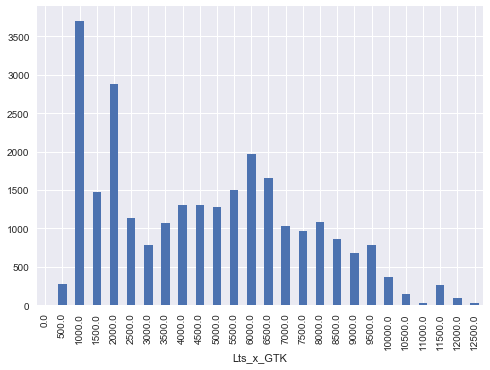

In [55]:
f = f[(f.Lts_x_GTK < 13000)]
f.groupby(f.Lts_x_GTK // 500*500 ).size().plot(kind='bar')


In [7]:
# percentaje of observations including shunting
len(f)/len(fuel)

0.5085638998682477

In [8]:
z = fuel
z = z[(z.Gross_Ton_km <=0)]
len(z)

21758

In [9]:
# percentaje of observations excluding GTK < 0
len(f)/(len(fuel)-len(z))

0.8529457533223367

In [10]:
len(fuel)

53889

In [11]:
f.Type.value_counts()

CARGA         18073
PASAJEROS      7819
MIXTO           794
ESPECIALES      720
Name: Type, dtype: int64

In [17]:
f.Sub_Type.value_counts()

CARGA GENERAL            14651
EXPRESO ORIENTAL          3923
TREN REGIONAL             3892
DERIVADOS DE PETROLEO     3422
TREN MIXTO AL SUR          794
SERVICIO INTERNO           637
LOCOMOTORA SOLA             58
SOCORRO                     25
AUTOMOTOR                    4
Name: Sub_Type, dtype: int64

In [18]:
f.Model_Loc.value_counts()

GE U20C    13695
GE U10B    10301
GM          3410
Name: Model_Loc, dtype: int64

In [19]:
f.Locomotive.value_counts()

976     1724
975     1399
971     1315
2009    1280
2006    1222
2002    1219
2000    1209
2005    1199
2004    1193
977     1185
2010    1185
2001    1109
2003    1109
2007    1091
979     1090
972     1025
978     1010
974      993
1203     891
1201     759
2008     725
2011     708
1602     696
1202     685
973      560
2012     446
1601     379
Name: Locomotive, dtype: int64

In [20]:
f.Sector.value_counts()

E    23559
N     2292
S     1545
Name: Sector, dtype: int64

In [21]:
f.Direction.value_counts()

0    16311
1    11095
Name: Direction, dtype: int64

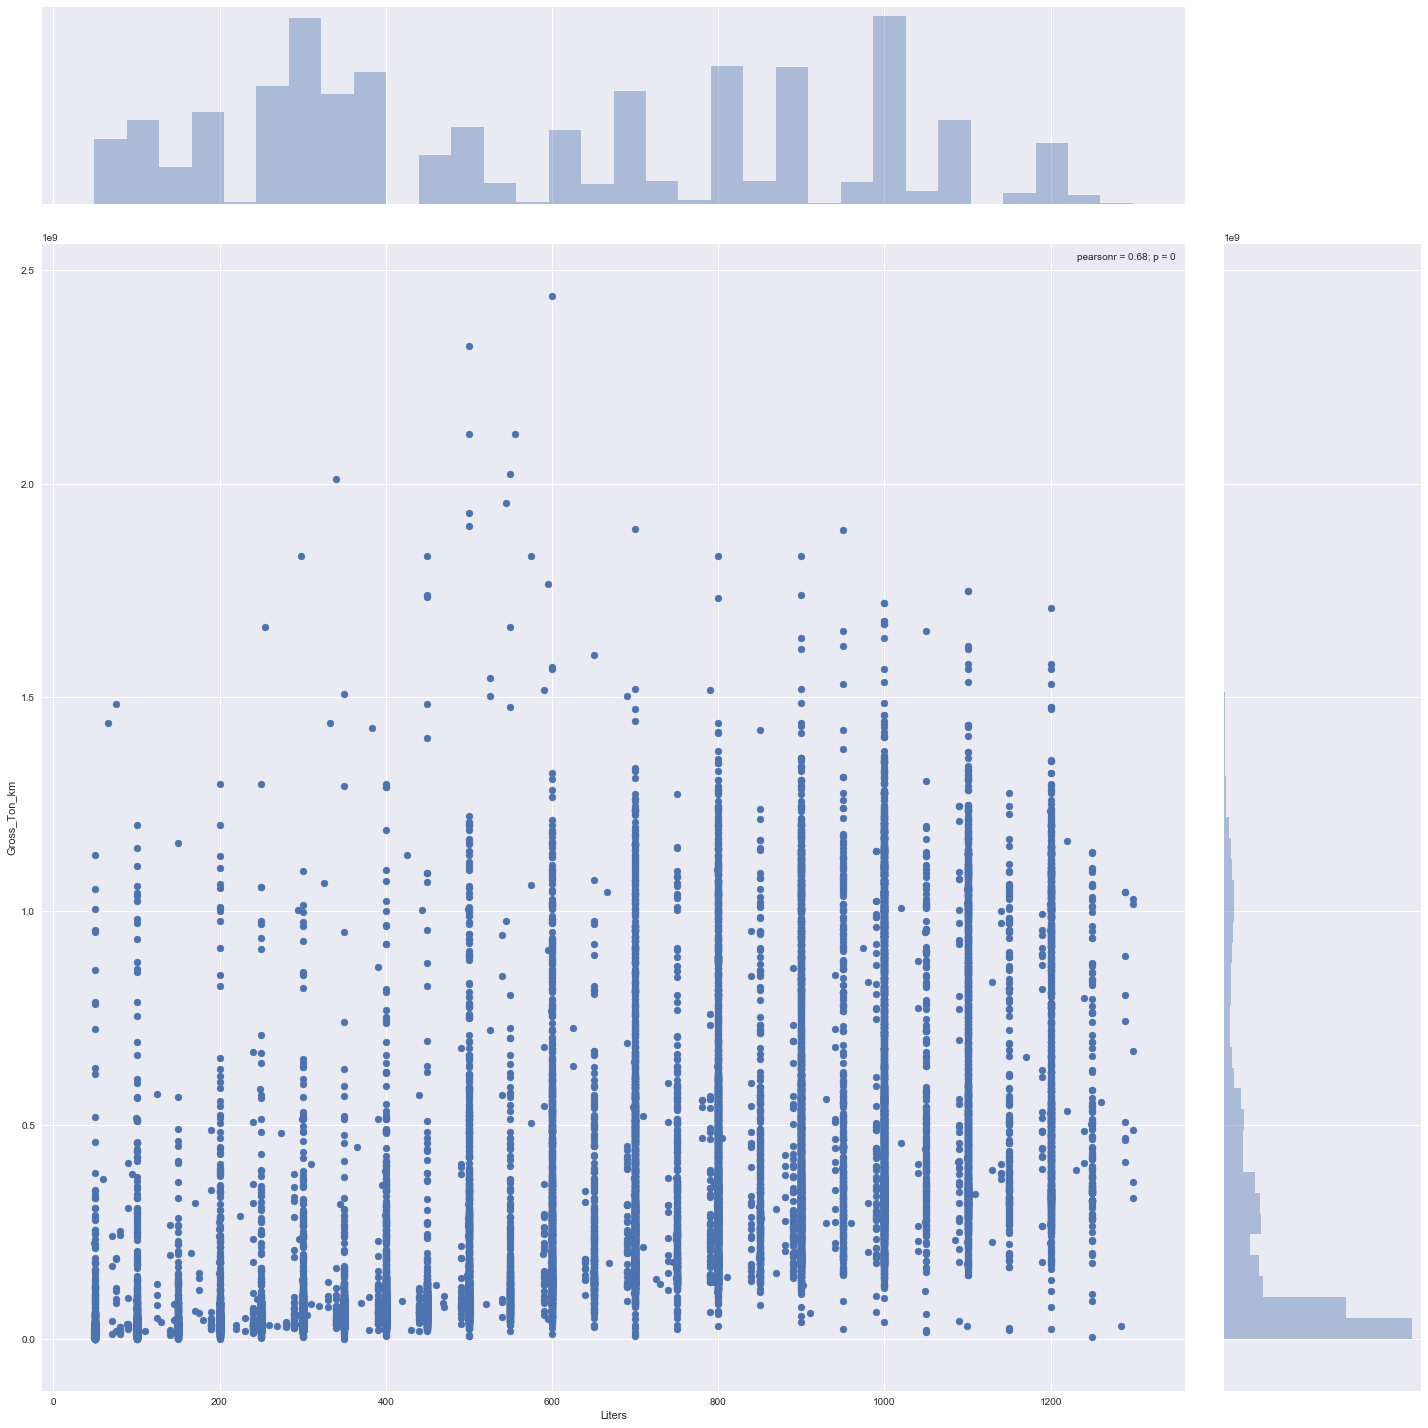

In [12]:
# Show the whole data distribution with a  joint
sns.jointplot(x="Liters", y="Gross_Ton_km", data=f, size=20)

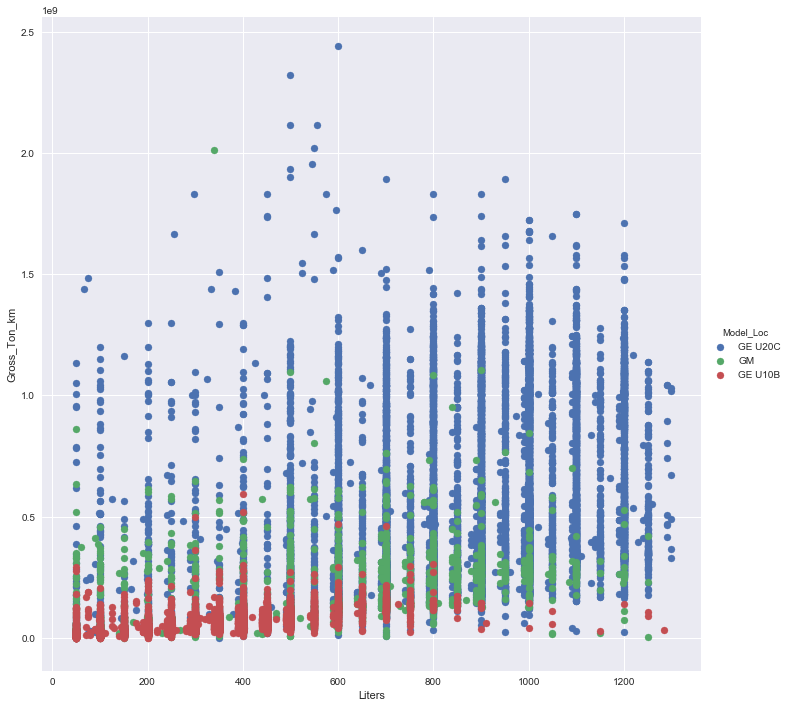

In [13]:
# We'll use seaborn's FacetGrid to color the scatterplot by Locomotive Type
sns.FacetGrid(f, hue="Model_Loc", size=10) \
   .map(plt.scatter, "Liters", "Gross_Ton_km") \
   .add_legend()


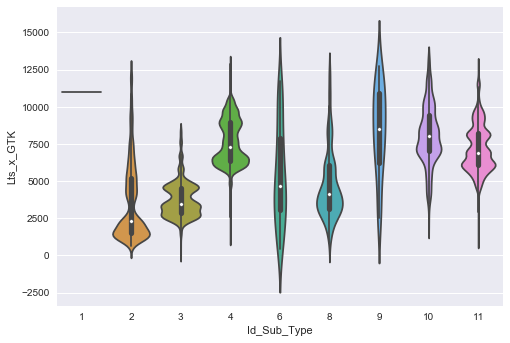

In [17]:
# A violin plot 
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Id_Sub_Type", y="Lts_x_GTK", data=f, size=60)

In [32]:
cols = list(f.loc[:,'Id_Sub_Type':'Sub_Type']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK']
g= f[cols]
# Show the mean grouped by type of train
g.groupby(['Id_Sub_Type', 'Sub_Type']).mean()

,,Hours,Kilometers,Liters,Lts_x_GTK
Id_Sub_Type,Sub_Type,,,,
1,AUTOMOTOR,0.000000,239.800000,50.000000,10974.057328
2,CARGA GENERAL,0.531773,177.580998,696.527473,3587.880908
3,DERIVADOS DE PETROLEO,0.493571,209.949912,823.463179,3776.145151
4,EXPRESO ORIENTAL,0.172317,211.567882,302.990568,7617.733263
6,LOCOMOTORA SOLA,0.448276,135.737931,177.603448,5345.228785
8,SERVICIO INTERNO,0.301413,129.716641,353.572998,4703.438938
9,SOCORRO,0.600000,134.836000,170.000000,8427.498093
10,TREN MIXTO AL SUR,0.311083,266.561083,394.356423,8074.535710
11,TREN REGIONAL,0.188335,210.257066,329.748201,7197.142011


In [33]:
# Show the standard deviation grouped by type of train
g.groupby(['Id_Sub_Type', 'Sub_Type']).std()

,,Hours,Kilometers,Liters,Lts_x_GTK
Id_Sub_Type,Sub_Type,,,,
1,AUTOMOTOR,0.000000,0.000000,0.000000,0.000000
2,CARGA GENERAL,2.511189,80.165768,346.801409,2621.005532
3,DERIVADOS DE PETROLEO,2.367035,56.723360,228.699640,1183.573106
4,EXPRESO ORIENTAL,1.012355,55.882882,88.996150,1464.673953
6,LOCOMOTORA SOLA,1.758911,96.846643,134.465014,3281.781739
8,SERVICIO INTERNO,1.679571,71.542891,307.162690,2260.627952
9,SOCORRO,3.000000,88.843176,125.000000,2908.363000
10,TREN MIXTO AL SUR,1.646641,28.343287,152.173170,1993.112846
11,TREN REGIONAL,1.140699,56.366612,104.324047,1546.515149


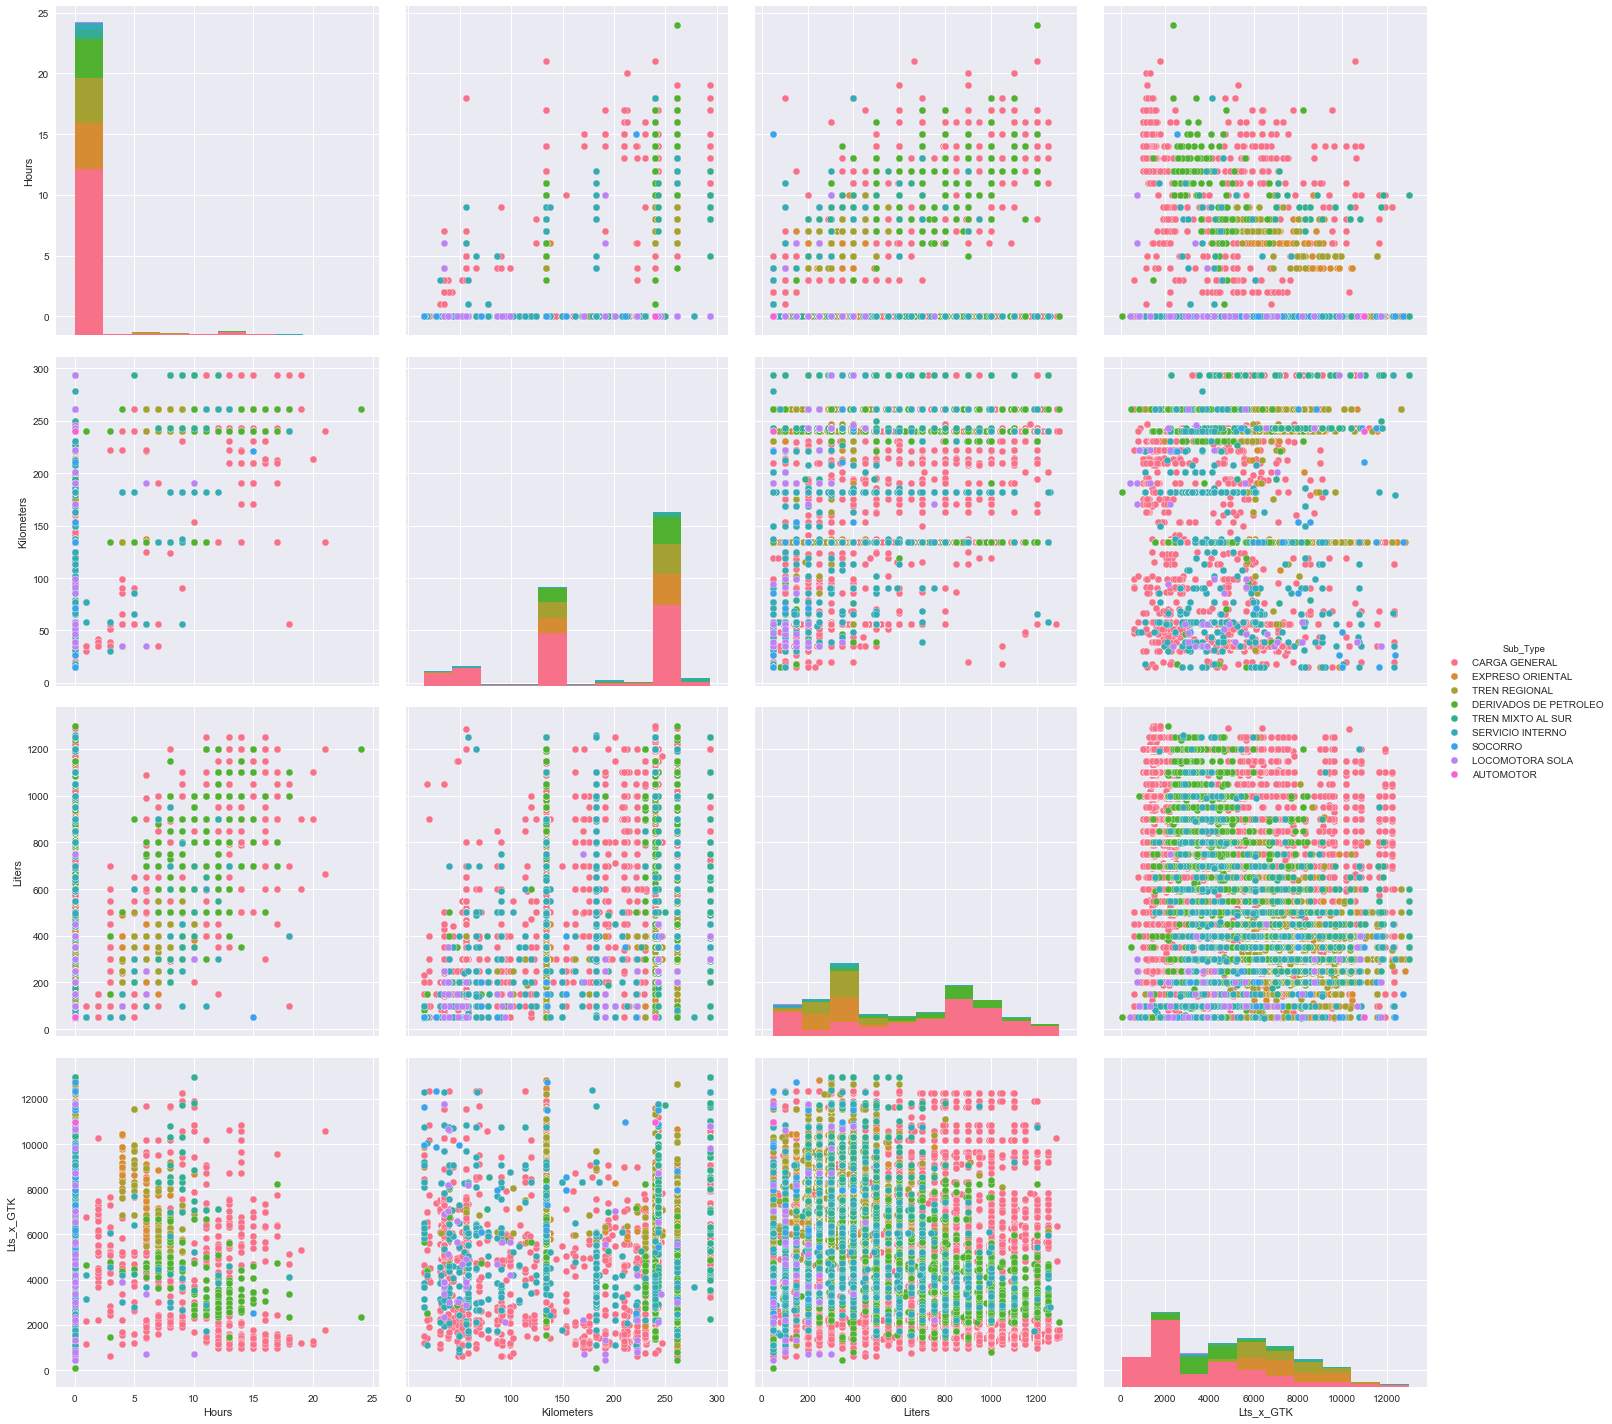

In [36]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(g.drop("Id_Sub_Type", axis=1), hue="Sub_Type", size=5)

In [45]:
# Don't take into account special trains - Short distance
f = f[(f.id_Type != 2)]

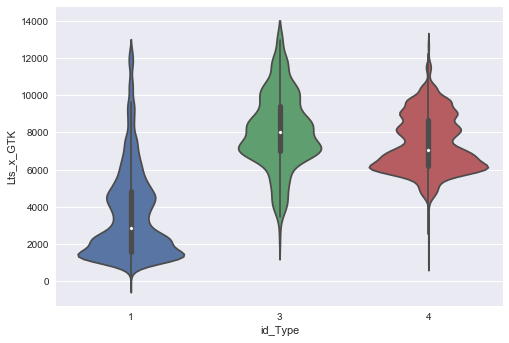

In [46]:
# A violin plot 
# Let's reduce the division to type of train
sns.violinplot(x="id_Type", y="Lts_x_GTK", data=f, size=60)

In [47]:
cols = list(f.loc[:,'id_Type':'Type']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK']
gtype= f[cols]
# Show the mean grouped by type of train
gtype.groupby(['id_Type', 'Type']).mean()

,,Hours,Kilometers,Liters,Lts_x_GTK
id_Type,Type,,,,
1,CARGA,0.524539,183.709832,720.561888,3623.527466
3,MIXTO,0.311083,266.561083,394.356423,8074.535710
4,PASAJEROS,0.180202,210.929850,316.180074,7410.095988


In [48]:
# Show the standard deviation grouped by type of train
gtype.groupby(['id_Type', 'Type']).std()

,,Hours,Kilometers,Liters,Lts_x_GTK
id_Type,Type,,,,
1,CARGA,2.484518,77.327642,331.469001,2416.503860
3,MIXTO,1.646641,28.343287,152.173170,1993.112846
4,PASAJEROS,1.077877,56.113987,98.006191,1522.254483


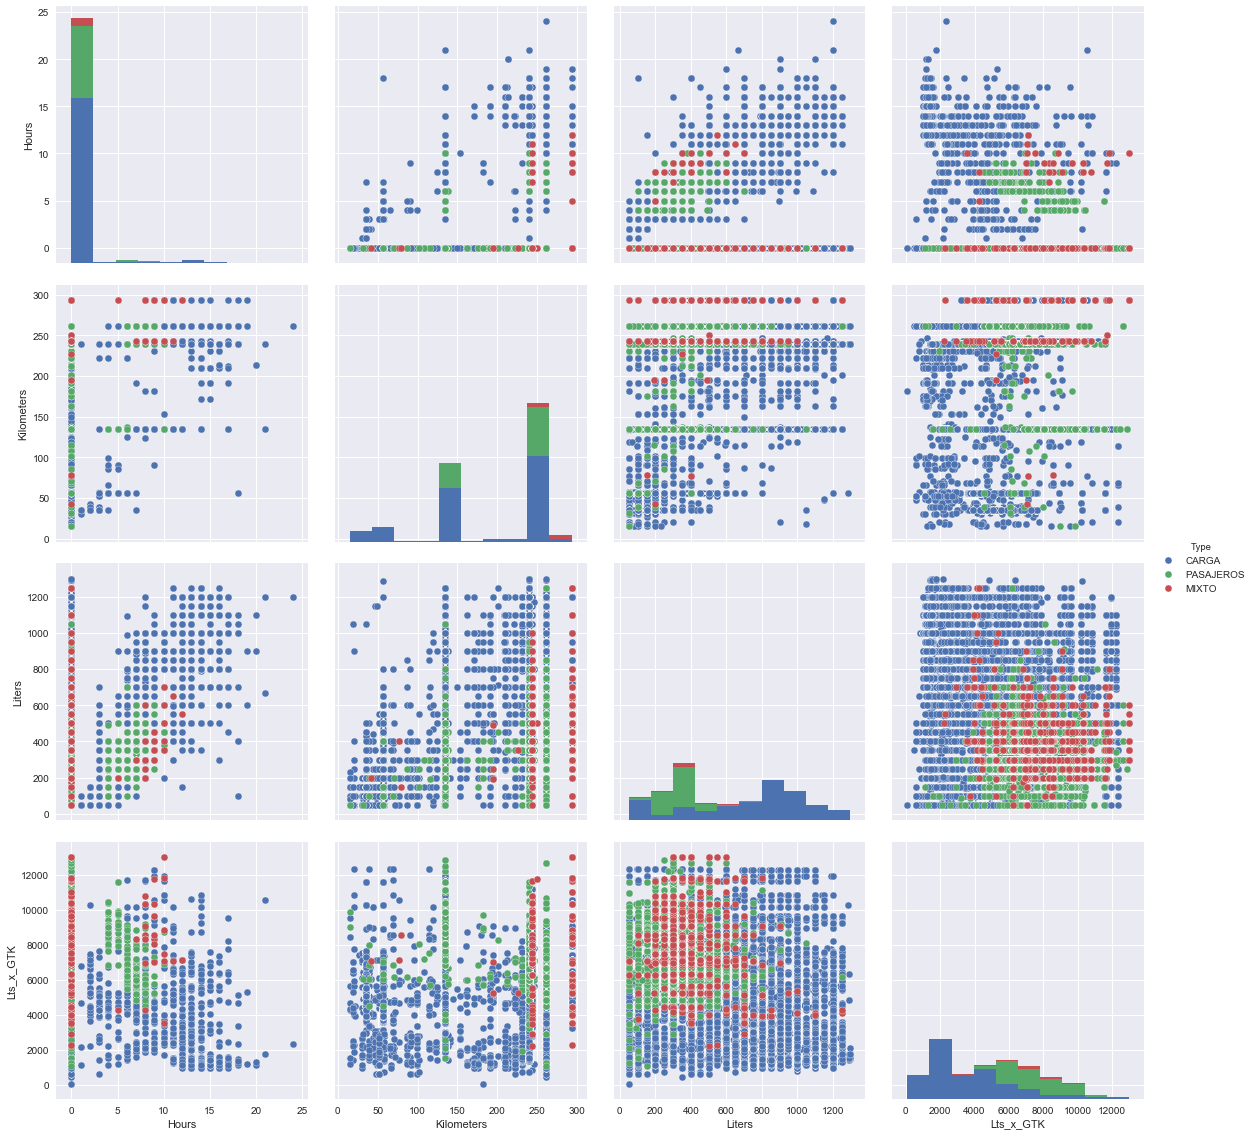

In [50]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gtype.drop("id_Type", axis=1), hue="Type", size=4)

In [56]:
# Only take into account Freight Trainas
f = f[(f.id_Type == 1)]

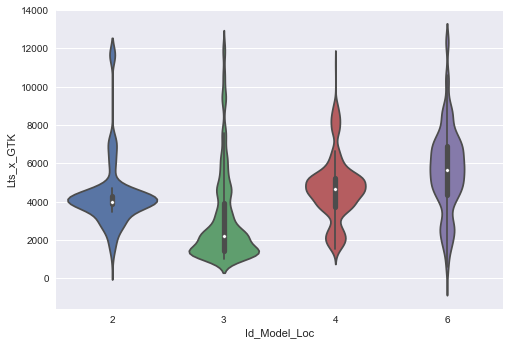

In [58]:
# A violin plot 
# Let's reduce the division to locomotive model
sns.violinplot(x="Id_Model_Loc", y="Lts_x_GTK", data=f, size=60)

In [59]:
cols = list(f.loc[:,'Id_Model_Loc':'Model_Loc']) + list(f.loc[:,'Hours':'Liters']) + ['Lts_x_GTK']
gtype= f[cols]
# Show the mean grouped by type of train
gtype.groupby(['Id_Model_Loc', 'Model_Loc']).mean()

,,Hours,Kilometers,Liters,Lts_x_GTK
Id_Model_Loc,Model_Loc,,,,
2,GM,0.404297,104.069434,369.675781,4313.227572
3,GE U20C,0.596381,204.606384,854.487030,3068.555850
4,GM,0.343825,140.056080,492.794945,4671.866484
6,GE U10B,0.320809,137.481358,293.064066,5666.492158


In [60]:
# Show the standard deviation grouped by type of train
gtype.groupby(['Id_Model_Loc', 'Model_Loc']).std()

,,Hours,Kilometers,Liters,Lts_x_GTK
Id_Model_Loc,Model_Loc,,,,
2,GM,1.971106,73.146094,286.014027,1760.284935
3,GE U20C,2.705182,61.605082,243.230935,2350.733957
4,GM,1.846068,87.105025,311.949001,1615.065096
6,GE U10B,1.697956,91.238517,209.466253,2230.721816


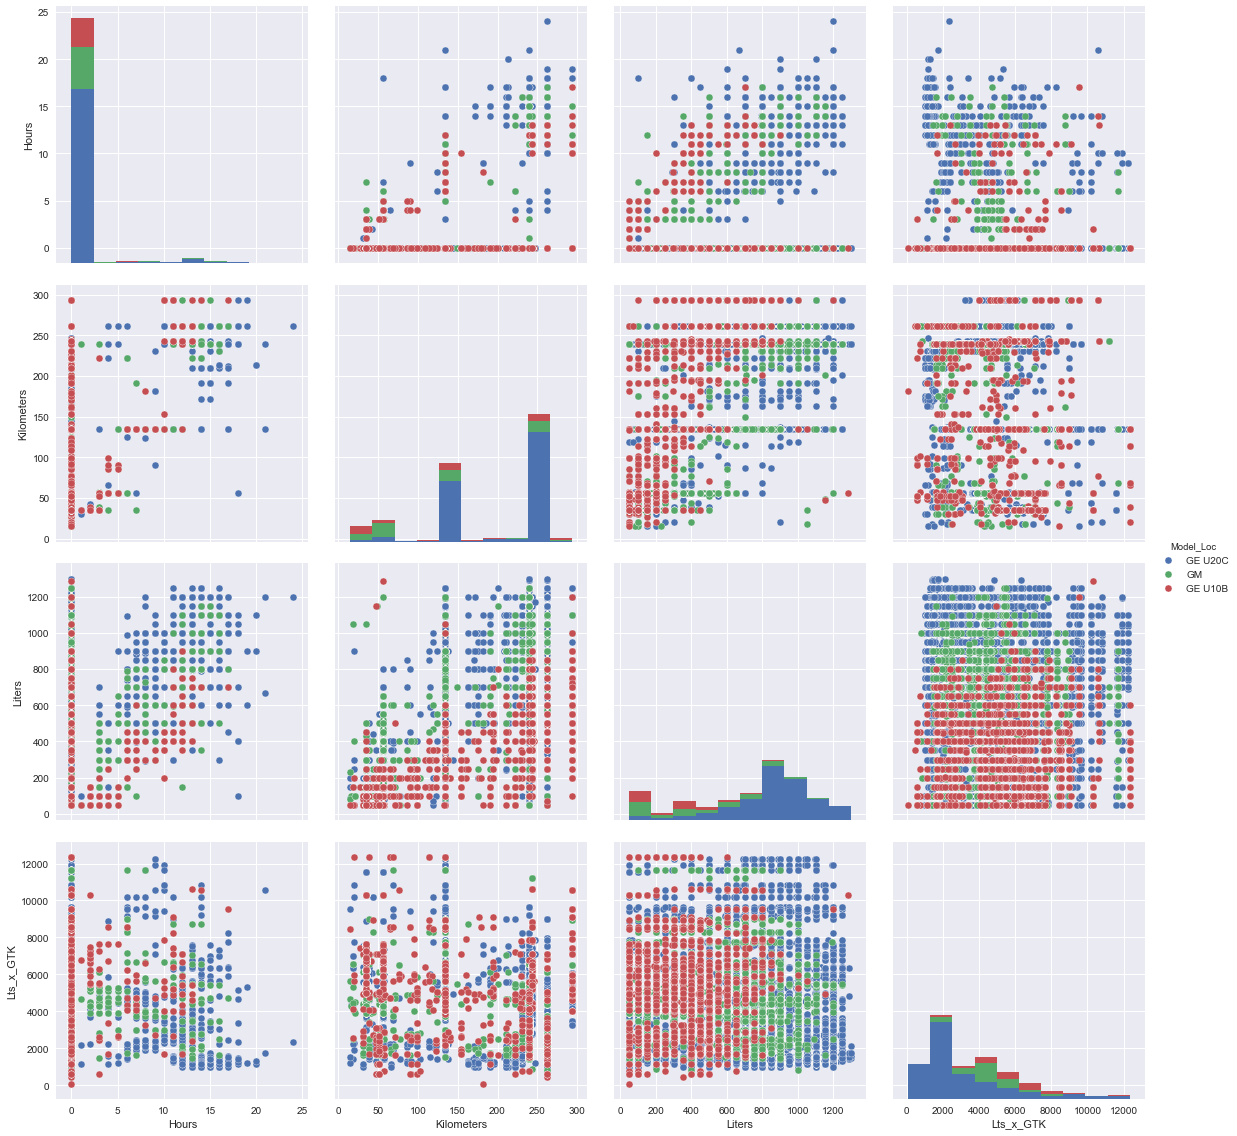

In [62]:
# From the pairplot, we'll see what seperates all pair of selected variables

sns.pairplot(gtype.drop("Id_Model_Loc", axis=1), hue="Model_Loc", size=4)